In [ ]:
# 3 September 2021
# Set analyses between different ecDNA classifications

In [1]:
import pandas as pd
import os
os.chdir('/mnt/c/Users/ochapman/Documents/Mesirov/scRNA+ATAC/2021-08-17_featurecounts-permutation-2')
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import math
from statsmodels.stats.multitest import multipletests 
from matplotlib_venn import *

import upsetplot

%matplotlib inline
pd.set_option('display.max_rows', 30)

In [3]:
# functions
def load_ecDNA_classes(sample):
    file = sample+"_cell-classifications.tsv"
    return pd.read_csv(file,sep='\t',index_col=0)

def load_seurat_metadata(sample):
    file = "../2021-08-29_seurat/"+sample.lower()+"_seurat_metadata.tsv"
    return pd.read_csv(file,sep='\t',index_col=0)

def summary_venn3(df,out_prefix=None):
    _000 = df[~df.ecDNA1 & ~df.ecDNA2 & ~df.ecDNA3]
    _001 = df[~df.ecDNA1 & ~df.ecDNA2 & df.ecDNA3]
    _010 = df[~df.ecDNA1 & df.ecDNA2 & ~df.ecDNA3]
    _100 = df[df.ecDNA1 & ~df.ecDNA2 & ~df.ecDNA3]
    _101 = df[df.ecDNA1 & ~df.ecDNA2 & df.ecDNA3]
    _110 = df[df.ecDNA1 & df.ecDNA2 & ~df.ecDNA3]
    _011 = df[~df.ecDNA1 & df.ecDNA2 & df.ecDNA3]
    _111 = df[df.ecDNA1 & df.ecDNA2 & df.ecDNA3]

    subsets = (len(_100),len(_010),len(_110),len(_001),len(_101),len(_011),len(_111),len(_000))
    plt.figure()
    venn3_unweighted(subsets[:-1],set_labels=['ecDNA1','ecDNA2','ecDNA3'],alpha=0.5)
    if out_prefix != None:
        plt.savefig(out_prefix+' venn.svg')
        plt.savefig(out_prefix+' venn.png')
    return subsets
    
def plot_upset(df,out_prefix=None):
    # data = upsetplot.from_indicators(df) # from_indicators is bugged, hardcode for now.
    _000 = df[~df.ecDNA1 & ~df.ecDNA2 & ~df.ecDNA3]
    _001 = df[~df.ecDNA1 & ~df.ecDNA2 & df.ecDNA3]
    _010 = df[~df.ecDNA1 & df.ecDNA2 & ~df.ecDNA3]
    _100 = df[df.ecDNA1 & ~df.ecDNA2 & ~df.ecDNA3]
    _101 = df[df.ecDNA1 & ~df.ecDNA2 & df.ecDNA3]
    _110 = df[df.ecDNA1 & df.ecDNA2 & ~df.ecDNA3]
    _011 = df[~df.ecDNA1 & df.ecDNA2 & df.ecDNA3]
    _111 = df[df.ecDNA1 & df.ecDNA2 & df.ecDNA3]
    data = upsetplot.from_memberships(
        [[],
         ['ecDNA1'],
         ['ecDNA2'],
         ['ecDNA3'],
         ['ecDNA1','ecDNA2'],
         ['ecDNA1','ecDNA3'],
         ['ecDNA2','ecDNA3'],
         ['ecDNA1','ecDNA2','ecDNA3']
        ],
        data=[len(_000),len(_100),len(_010),len(_001),len(_110),len(_101),len(_011),len(_111)]
    )
    plt.figure()
    upsetplot.plot(data)
    if out_prefix != None:
        plt.savefig(out_prefix+' upset.svg')
        plt.savefig(out_prefix+' upset.png')
    return data

(0, 0, 1, 10, 16, 218, 2741, 0)

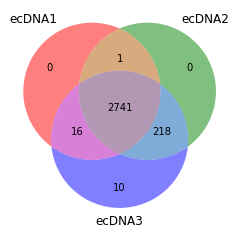

In [6]:
# rmcb56-ht, seurat cells
sample='RCMB56-ht'
df = load_ecDNA_classes(sample)
df = df.loc[load_seurat_metadata(sample).index.tolist(),:]
summary_venn3(df,out_prefix=sample)